En este programa se va a calcular las entradas de la matriz de transferencia
$$\mathbb{M}_N\mathbb{M}_{N-1}\cdots\mathbb{M}_1$$
Y cuya matriz $\mathbb{M}$ esta dada por la multiplicación de las matrices 
$$\mathbb{D}_j^{-1}\mathbb{D}_{j-1}$$.
La matriz $\mathbb{D}$ está dada por
$$\mathbb{D}_j =
\left(\begin{array}{cc}
e^{i\omega r_{*}(R_j)} & e^{-i\omega r_{*}(R_j)}\\
i\omega e^{i\omega r_{*}(R_j)} & -i\omega e^{-i\omega r_{*}(R_j)}
\end{array}\right)+\frac{A}{8 i \omega R_j}\mathscr{C}_{j}(R_j)\left(\begin{array}{cc}
2R_j e^{-2i\omega R_j}E_{2}{(-2i\omega R_j)}e^{i\omega r_{*}(R_j)} & 2 R_j e^{2i\omega R_j}E_{2}{(2i\omega R_j)}e^{-i\omega r_{*}(R_j)}\\
-\left[1+F(R_j)\right]e^{i\omega r_{*}(R_j)} & -\left[1+\overline{F}(R_j)\right]e^{-i\omega r_{*}(R_j)}
\end{array}\right)    ,
$$
con $F(r):=1+2i\omega r E_{2}{(-2i\omega r)}e^{-2i\omega r}$ y $\mathscr{C}_j(r) := \frac{2m_j}{r}$
$$\mathbb{D}_j^{-1}\mathbb{D}_{j-1} = 
\left(\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right) + 
\frac{A(m_j-m_{j-1})}{4i\omega R_j^2}
\left(\begin{array}{cc}
1 & \overline{F(r)}e^{-2i\omega r_*(R_j)}\\
-F(r)e^{2i\omega r_*(R_j)} & -1
\end{array}\right)    .
$$

Con la compacidad como forma recursiva
$$
C_j \equiv \frac{2m_j}{R_j} = 1 - \frac{1}{(4\alpha + 1)^2} \frac{1}{1 - \dfrac{R_{j-1}}{R_j}C_{j-1}}
$$

Entonces la primer compacidad queda establecida como
$$
C_1 = 1 - \frac{1}{(4\alpha + 1)^2}=\frac{8\alpha(2\alpha+1)}{(4\alpha + 1)^2}.
$$

Entonces, fijar la masa es equivalente a fijar el radio
$$
m_1 = \frac{R_1}{2} \left(1 - \frac{1}{(4\alpha + 1)^2}\right)
$$
Y si queremos radios equidistantes entonces $R_j - R_{j-1} = \Delta R \longrightarrow R_j = j\Delta R$, además la matriz
$$
\mathbb{M}_1 = \mathbb{1}+\frac{A C_1}{8i\tilde{\omega}}
\left(\begin{array}{cc}
1 & \overline{F(\Delta R)}e^{-2i\tilde{\omega} }\\
-F(\Delta R) e^{2i\tilde{\omega} } & -1
\end{array}\right)    ,
$$
donde se define el parámetro adimensional $\tilde{\omega} \equiv \omega \Delta R$

Y con lo anterior se obtiene
$$
C_j \equiv \frac{2m_j}{R_j} = 1 - \frac{1}{(4\alpha + 1)^2} \frac{1}{1 - \dfrac{j-1}{j}C_{j-1}}
$$

In [6]:
##Repositorios
#Para calculos numéricos
import numpy as np

#Para gráficos
from matplotlib import pyplot as plt

#Algoritmos especiales para integrar
from scipy.integrate import quad
import scipy.special as special

#Algoritmos especiales para cálculo complejo
import mpmath
mpmath.mp.prec = 100
plt.rcParams['figure.figsize'] = [10, 8]

## Para usar latex en las ecuaciones
plt.rcParams['text.usetex'] = True


Se definen algunas funciones especiales, por ejemplo la compacidad $C_1$ que es independiente del primer radio del cascarón $R_1$. Esta función también esta incluida en la función C_k en las próximas celdas.

In [3]:
def C_1(a):
    answ = 1 - 1/(4*a+1)**2
    return answ

#a = np.linspace(1e-8,1,100)
#C1 = C_1(a)

#plt.plot(a,C1,)

Se define la función de la compacidad en el limite, cuyo resultado es
$$
C_{\infty} = 1 - \frac{1}{4\alpha + 1}    .
$$
Con $\alpha$ el parametro de la presión del fluido $P_k=\alpha \sigma_k$, este esta restringido al intervalo $\alpha \in (0,1]$

In [4]:
def C_infty(a):
    answ = 1 - 1/(4*a+1)
    return answ

Se define la compacidad para el cascarón k-ésimo tomando en cuenta cascarones radialmente equidistantes:
$$
C_k \equiv \frac{2m_k}{R_k} = 1 - \frac{1}{(4\alpha + 1)^2} \frac{1}{1 - \dfrac{k-1}{k}C_{k-1}}
$$

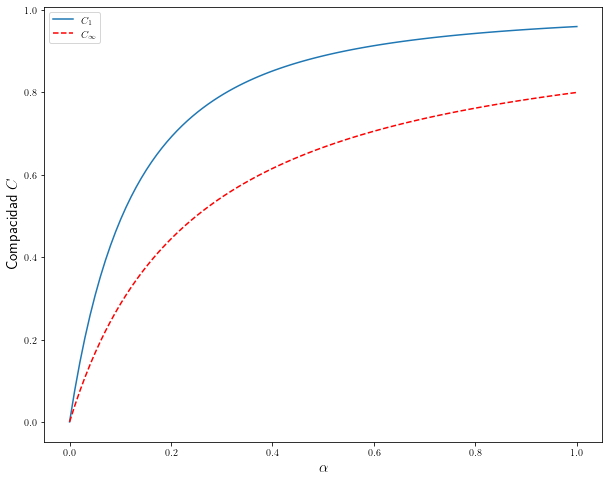

In [18]:
def C_k(a,k):
    if k < 1:
        return 0
    tmp1 = 1 - ((k-1)/k)*C_k(a,k-1)
    tmp2 = 1 - (1/(4*a+1)**2)/tmp1
    return tmp2

#MatCk = []        ## Arreglo que guarda tipo de datos de matplotlib
a = np.linspace(1e-8,1,100)   ## este el el paremetro \alpha

### Siguiente algoritmo para guardar los Ck en el arreglo, esto variando el numero de cascarones
num_cas = 1   # Numero de cascarones
pas_cas = 1   # Paso de cascarones
fig,ax = plt.subplots()
for k in range(1,num_cas+1,pas_cas):
    ax.plot(a,C_k(a,k))
#    p_tmp = plt.plot(a,C_k(a,k))
#    MatCk.append(p_tmp)

##Se agrega al arreglo el gráfico de la
#MatCk.append(plt.plot(a,C_infty(a),"r--"))
ax.plot(a,C_infty(a),'r--')

## Parametros para el formato del gráfico
ax.legend([r'$C_1$',r'$C_\infty$'])
ax.set_ylabel(r"Compacidad $C$",fontsize=15)
ax.set_xlabel(r'$\alpha$', fontsize=15)
#fig.set_figheight(8)
#fig.set_figwidth(10)
#ax.legend(r'$C_1$',r'$C_\infty$')

## Para guardar la gráfica en un archivo
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Plot_C_01.svg'

plt.savefig(image_name)
plt.show()

En la gráfica anterior se muestra la compacidad del primer cascarón (línea continua azul) y el caso límite donde hubiera infinitos cascarones (linea discontinua roja). Y todos los casos intermedios se encuentran entre estas dos líneas, permitiendo discernir que el aumento de cascarones disminuye la compacidad.

Ahora se escriben las componentes de la matriz
$$
\mathbb{S}\equiv\mathbb{M}_N\mathbb{M}_{N-1}\cdots\mathbb{M}_1 
= \mathbb{1} + \frac{A}{4 i\tilde{\omega} } \sum_{k=1}^{N} \frac{1}{k}\left(\frac{C_k}{2} - \frac{k-1}{k}C_{k-1}\right)    \\ \times
\left(\begin{array}{cc}
1 & \left(e^{-2 i k\tilde{\omega} }-2i k\tilde{\omega}  E_2(2i k \tilde{\omega} )\right) \prod_{l=1}^{k-1} 
Exp \left(\frac{i l \tilde{\omega}  C_{l} \log{\left(\frac{1+\frac{1}{l}-C_{l}}{1-C_{l}}\right)}}{2}\right)\\
-\left(e^{2 i k\tilde{\omega} }+2i k\tilde{\omega}  E_2(-2i k \tilde{\omega} )\right) \prod_{l=1}^{k-1} 
Exp \left(\frac{-i l \tilde{\omega}  C_{l} \log{\left(\frac{1+\frac{1}{l}-C_{l}}{1-C_{l}}\right)}}{2}\right) & -1
\end{array}\right)
$$

En donde 
$$
S(1,1) = 1 + \frac{A}{4i \tilde{\omega} }\sum_{k=1}\frac{1}{k}\left(\frac{C_k}{2}-\frac{k-1}{k}C_{k-1}\right), \\
S(2,2) = \overline{S(1,1)}= -1 + \frac{A}{4i\tilde{\omega}}\sum_{k=1}\frac{1}{k} \left(\frac{C_k}{2}-\frac{k-1}{k}C_{k-1}\right), \\
S(1,2) = 1 + \frac{A}{4i \tilde{\omega} }\sum_{k=1} \frac{1}{k}\left(\frac{C_k}{2}-\frac{k-1}{k}C_{k-1}\right)\times
\left(e^{-2 i k \tilde{\omega} }-2i k \tilde{\omega} E_2(2i k \tilde{\omega} )\right) \prod_{l=1}^{k-1} 
Exp \left(\frac{i l \tilde{\omega} C_{l} \log{\left(\frac{1+\frac{1}{l}-C_{l}}{1-C_{l}}\right)}}{2}\right),\\
S(2,1) = \overline{S(1,2)}   .
$$

Se define la exponencial integral
$$
    E_p(z) := \int_{1}^{\infty}\frac{e^{-zt}}{t^p}dt    .
$$
Sin embargo la integral-exponencial esta definida para valores complejos en las librerias ["mpmath"](https://mpmath.org/doc/current/functions/expintegrals.html), con el comando: mpmath.expint(p,z)

In [8]:
def integrand(t,p,z):
    return np.exp(-z*t) / t**p
def expint(p,z):
    return quad(integrand, 1, np.inf, args=(p, z))[0]

$$
S(1,1) = 1 + \frac{A}{4i \tilde{\omega} }\sum_{k=1}\frac{1}{k}\left(\frac{C_k}{2}-\frac{k-1}{k}C_{k-1}\right)
$$

In [9]:
def S11(k,A,a,w_):
    tmp = 1
    for n in range(1,k+1):
        tmp += (A*(C_k(a,n)/2 - ((n-1)/n)*C_k(a,n-1)))/(n*4*1j*w_)
    return tmp

In [10]:
## linespace(a,b,D) es un comando que te crea un vector en el intervalo (a,b) en un número de divisiones D,
## esto linealmente espaciados, (existe comandos logspace en ese caso serían logarimicamente espaciados)
w = np.linspace(1e-4,1,200)        #frecuencia
vecS11 = []        #Arreglo que guarda los valores de S_11 por cada frecuencia
## Ciclo para llenar el vector S_11
for w_ in w:
    vecS11.append(1/mpmath.mp.norm(S11(100,2,0.1,w_)))
#    vecS12.append(S12(100,w_tmp,2,0.1,5))

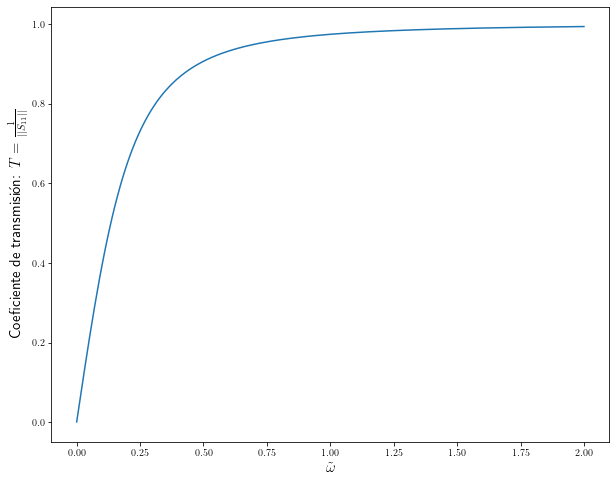

In [19]:
## Parametros para llenar el vector
plt.plot(w,vecS11)
plt.xlabel(r'$\tilde{\omega}$',fontsize=15)
plt.ylabel(r'Coeficiente de transmisión: $T=\frac{1}{||S_{11}||}$',fontsize=15)

plt.show()

$$
S(1,2) = 1 + \frac{A}{4i \tilde{\omega} }\sum_{k=1}\frac{1}{k}\left(\frac{C_k}{2}-\frac{k-1}{k}C_{k-1}\right)\times
\left(e^{-2i k \tilde{\omega} }-2i k \tilde{\omega} E_2(2i k \tilde{\omega} )\right) \prod_{l=1}^{k-1} 
Exp \left(\frac{i l \tilde{\omega} C_{l} \log{\left(\frac{1+\frac{1}{l}-C_{l}}{1-C_{,l}}\right)}}{2}\right)
$$

In [12]:
def S12(k,A,a,w_):
    tmp = 1
    tmp3 = 1 
    for n in range(1,k+1):
        tmp1 = A*(C_k(a,n)/2 - ((n-1)/n)*C_k(a,n-1))/(4*1j*n*w_)
        ## Condicional para hacer la multiplicatoria y hacerla en transcurso del ciclo principal
        if n >= 2:
            tmp4 = ( 1 + 1/(n-1) - C_k(a,n-1) )/( 1-C_k(a,n-1) )
            tmp3 *= np.exp( 1j*w_*(n-1)*C_k(a,n-1)*np.log(tmp4)/2 )
#        tmp3 = 1
#        for l in range(1,n): ## Como el rango corre de 1...n-1. Y como debe ser n-1
#            tmp4 = ( 1 + 1/l - C_k(a,l) )/( 1-C_k(a,l) )
#            tmp3 *= np.exp( 1j*w*l*C_k(a,l)*np.log(tmp4)/2 )
        tmp2 = ( np.exp( -2j*k*w_) - 2j*w_*k*mpmath.expint(2,2j*k*w_) )*tmp3
        tmp += tmp1 * tmp2
    return tmp

In [13]:
w = np.linspace(1e-4,2,200)
vecS12 = []
for w_ in w:
#    vecS12.append(1/mpmath.mp.norm(S12(20,w_tmp,2,0.1,1)))
    vecS12.append(S12(20,2,0.1,w_).real)
#    vecS12.append(S12(100,w_tmp,2,0.1,5))

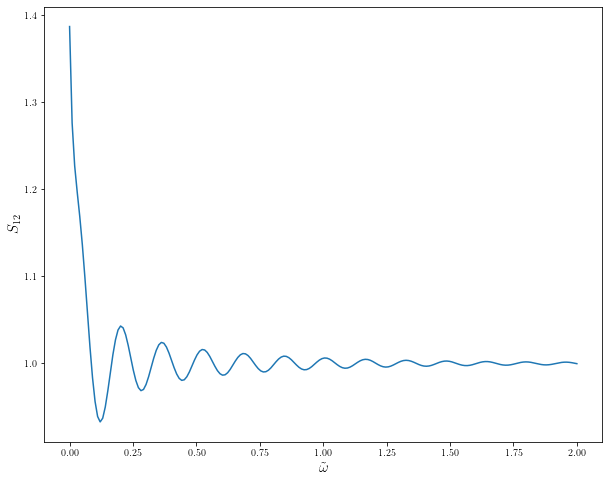

In [20]:
plt.plot(w,vecS12)
plt.xlabel(r'$\tilde{\omega}$',fontsize=15)
plt.ylabel(r'$S_{12}$',fontsize=15)

plt.show()